# 小麦とチェス盤問題
曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていきます。


If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?


Wheat and chessboard problem - Wikipedia（最終閲覧日：2019年5月31日）


8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

## 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。


サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [5]:
import numpy as np

n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("４マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる(ndarray) :{}".format(small_board_ndarray))
print("4マスの板に小麦を並べる(2×2) :\n{}".format(small_board_ndarray.reshape(2,2)))

４マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる(ndarray) :[1 2 4 8]
4マスの板に小麦を並べる(2×2) :
[[1 2]
 [4 8]]


## 【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [6]:
import numpy as np

def ches_number(axis0, axis1):
    n_squares = axis0 * axis1
    board_list = [1]
    
    for _ in range(n_squares - 1):
        board_list.append(2*board_list[-1])
    
    board_ndarray = np.array(board_list)
    
    return board_ndarray.reshape(axis0, axis1)

#縦マスの数
axis0 = 8
#横マスの数
axis1 = 8

print(ches_number(axis0, axis1))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

## 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。


棒グラフはサンプルコードを用意しています。

In [7]:
#小麦の合計
board_ndarray = ches_number(8, 8)
print("合計値は{}".format(board_ndarray.sum()))

合計値は1.8446744073709552e+19


In [13]:
#列の平均
board_ndarray = ches_number(8, 8)
print(" 列の平均は{}".format(board_ndarray.mean(axis = 0)))

 列の平均は[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


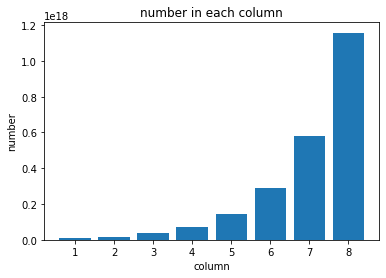

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), np.mean(board_ndarray, axis=0))
plt.show()

## 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。


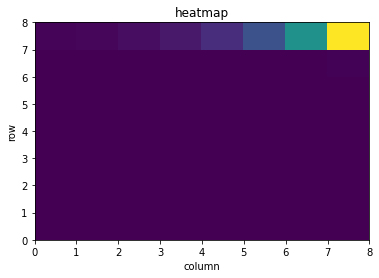

In [27]:
board_ndarray = ches_number(8, 8)


plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_ndarray)
plt.show()

## 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [31]:
board_ndarray = ches_number(8, 8)

first_harf = board_ndarray[:4, :].sum()
last_harf = board_ndarray[4: , :].sum()

answer = last_harf / first_harf

print("後半は前半の{}倍です。".format(answer))

後半は前半の4294967296.0倍です。


## 【問題6】他の計算方法によるn×mマスへの拡張

In [57]:
#np.append使用
import numpy as np

def ches_number(axis0, axis1):
    n_squares = axis0 * axis1
    board_list = [1]
    
    for _ in range(n_squares - 1):
        board_list = np.append(board_list, 2*board_list[-1]).astype(np.uint64)
    
    board_ndarray = np.array(board_list)
    
    return board_ndarray.reshape(axis0, axis1)

#縦マスの数
axis0 = 8
#横マスの数
axis1 = 8

print(ches_number(axis0, axis1))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

In [56]:
import numpy as np

#ブロードキャスト
def ches_number(axis0, axis1):
    n_squares = axis0 * axis1
    board_list = [1]
    
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares
    
    
    
    return small_board_ndarray.reshape(axis0, axis1)

#縦マスの数
axis0 = 8
#横マスの数
axis1 = 8
print(ches_number(axis0, axis1))




[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

## 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。


%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [60]:
%%timeit
#np.arrayの計算

import numpy as np

def ches_number(axis0, axis1):
    n_squares = axis0 * axis1
    board_list = [1]
    
    for _ in range(n_squares - 1):
        board_list.append(2*board_list[-1])
    
    board_ndarray = np.array(board_list)
    
    return board_ndarray.reshape(axis0, axis1)

#縦マスの数
axis0 = 8
#横マスの数
axis1 = 8

ches_number(axis0, axis1)

80.7 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [61]:
%%timeit
#np.appendの計算

import numpy as np

def ches_number(axis0, axis1):
    n_squares = axis0 * axis1
    board_list = [1]
    
    for _ in range(n_squares - 1):
        board_list = np.append(board_list, 2*board_list[-1]).astype(np.uint64)
    
    board_ndarray = np.array(board_list)
    
    return board_ndarray.reshape(axis0, axis1)

#縦マスの数
axis0 = 8
#横マスの数
axis1 = 8

ches_number(axis0, axis1)

2.9 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
%%timeit
#ブロードキャストの計算

import numpy as np


def ches_number(axis0, axis1):
    n_squares = axis0 * axis1
    #board_list = [1]
    
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares
    
    
    
    return small_board_ndarray.reshape(axis0, axis1)

#縦マスの数
#axis0 = 8
#横マスの数
#axis1 = 8

t = ches_number(8, 8)


17 µs ± 802 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


速さ順は
１　ブロードキャスト
２　np.array
３　no.append